In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [16]:
def plot_rgg(n, r):    
    # load graph
    G = nx.from_numpy_matrix(np.load('data/graphs/graph_{}_{}.npy'.format(n,r))[:,:,0])
    # load positions
    pos = np.load('data/graphs/positions_{}_{}.npy'.format(n,r))[:,:,0]

    # find node near center (0.5,0.5)
    dmin = 1
    ncenter = 0
    for k in range(pos.shape[0]):
        x, y = pos[k,:]
        d = (x - 0.5)**2 + (y - 0.5)**2
        if d < dmin:
            ncenter = k
            dmin = d

    # color by path length from node near center
    p = dict(nx.single_source_shortest_path_length(G, ncenter))

    plt.figure(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.2)
    nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                           node_size=50,
                           node_color=list(p.values()),
                           cmap=plt.cm.Reds_r)
    
    plt.title('RGG with radius = {}'.format(r))
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/graph_representation_{}_{}.jpeg'.format(n, r))
    plt.show()

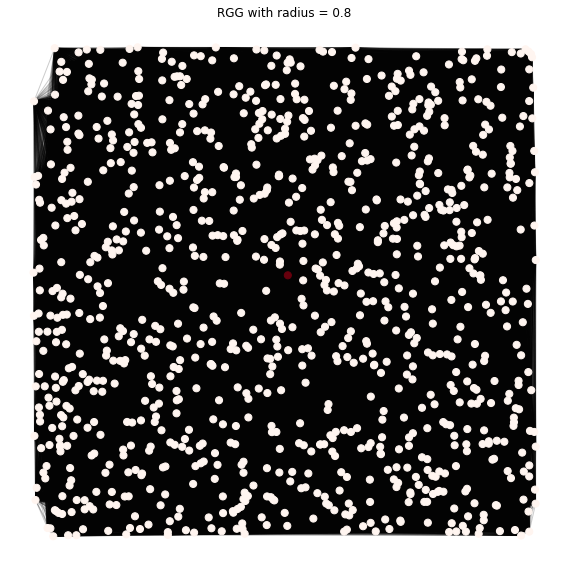

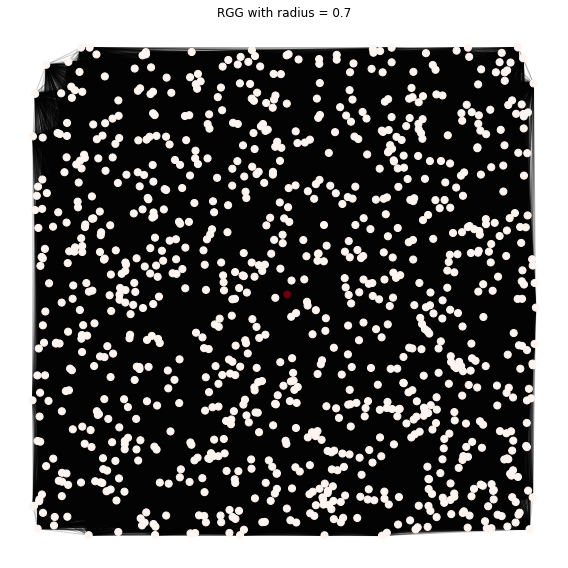

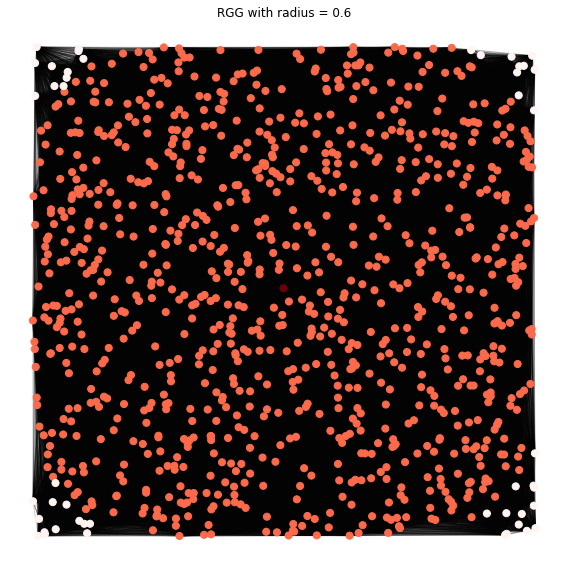

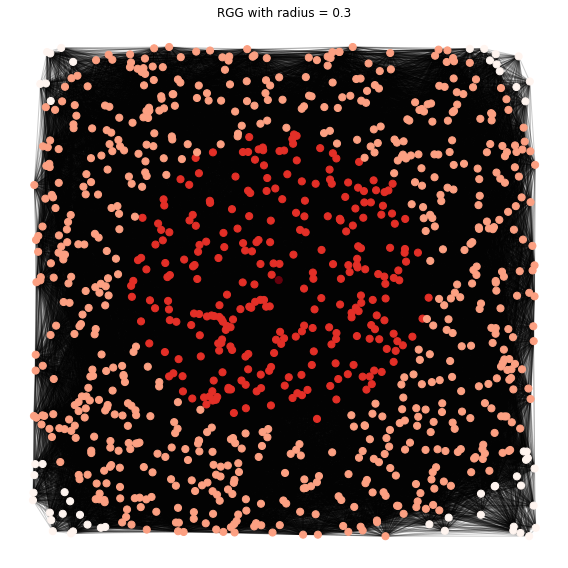

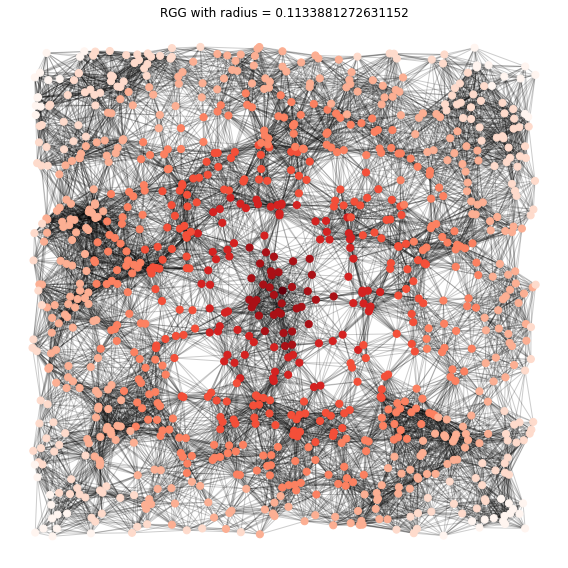

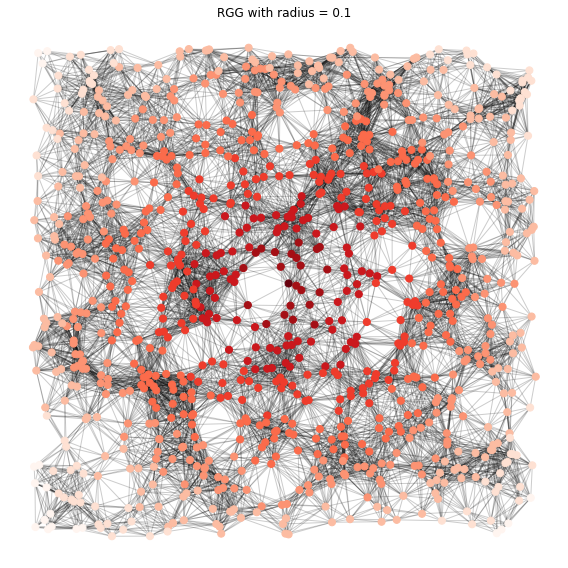

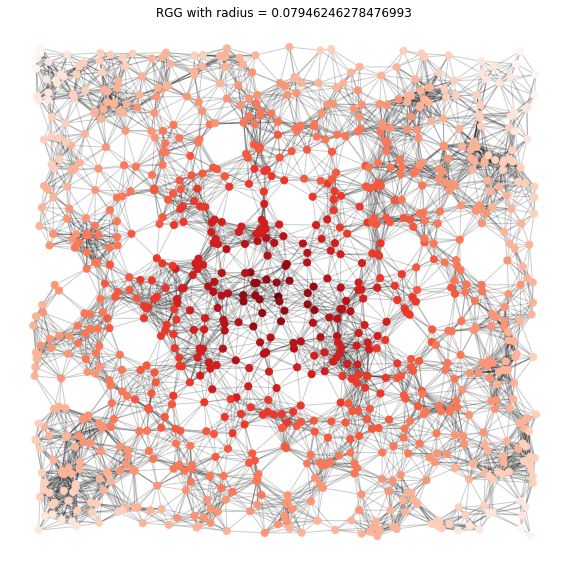

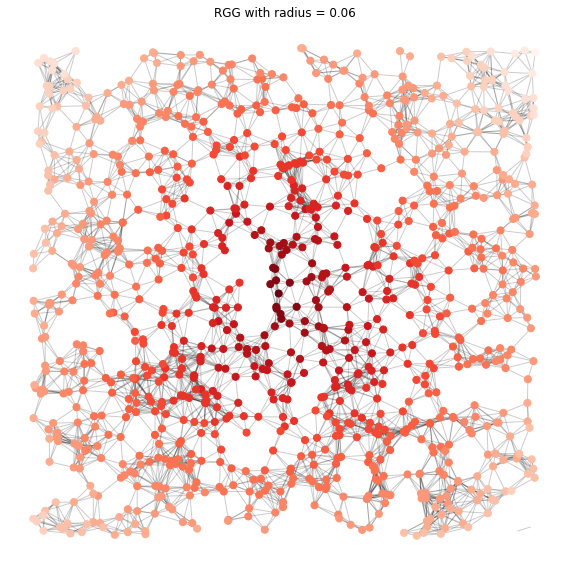

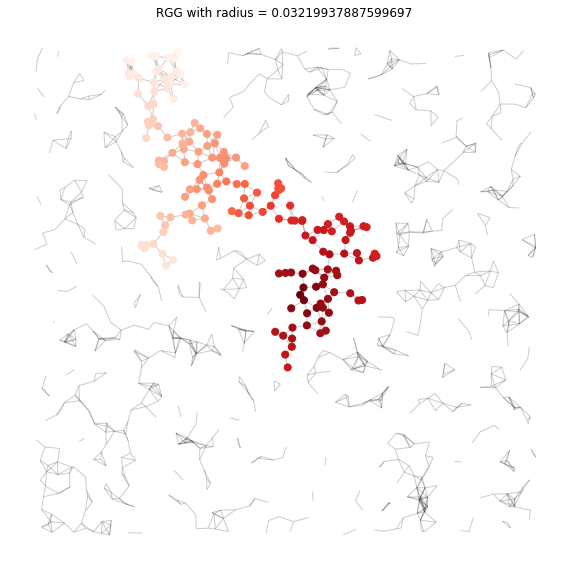

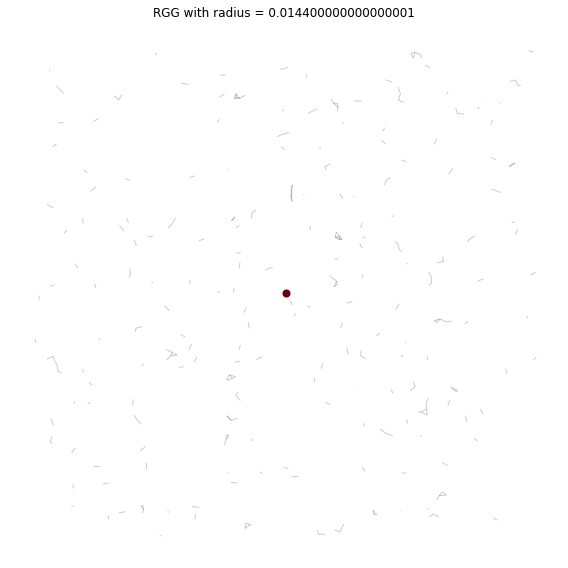

In [18]:
n = 1000
with open('data/keys{}.txt'.format(n), 'r') as f:
    radius = eval(f.read())
    radius.sort(reverse=True)
for r in radius:
    plot_rgg(n, r)

In [21]:
radius

[0.8,
 0.7,
 0.6,
 0.3,
 0.1133881272631152,
 0.1,
 0.07946246278476993,
 0.06,
 0.03219937887599697,
 0.014400000000000001]

In [3]:
n = 1000
with open('data/keys{}.txt'.format(n), 'r') as f:
    radius = eval(f.read())
    radius.sort(reverse=True)
G = nx.from_numpy_matrix(np.load('data/graphs/graph_{}_{}.npy'.format(n,radius[0]))[:,:,0])

In [7]:
list(nx.isolates(G))

[]

In [16]:
from math import pi
lc = 2.0736

# termodinamycal threshold
rt = lambda n: np.sqrt(lc/n)
# connectivity threshold
rc = lambda n: np.sqrt(np.log(n)/(n*pi))


In [17]:
rt(10**3)

0.04553679830642467

In [18]:
rc(10**3)

0.046891436282526934

In [19]:
np.log(n)

6.907755278982137

In [21]:
if n == 10**3: x = 6e-2
else: x = 4e-2
# define radius of interest
radius2 = [ 8e-1, 7e-1, 6e-1, 3e-1, 1e-1, x,                     # connected regime (high - low)
        rt(n) + (rc(n) - rt(n))/3, rt(n) + 2*(rc(n) - rt(n))/3, # supercritical regime
        rt(n) * 1/np.sqrt(10), rt(n) * 1/np.sqrt(2) ]           # subscritical regime

In [22]:
set(radius) & set(radius2)

{0.014400000000000001, 0.03219937887599697, 0.06, 0.1, 0.3, 0.6, 0.7, 0.8}

In [23]:
set(radius2) - set(radius) 

{0.04598834429845876, 0.04643989029049284}

In [25]:
radius2

[0.8,
 0.7,
 0.6,
 0.3,
 0.1,
 0.06,
 0.04598834429845876,
 0.04643989029049284,
 0.014400000000000001,
 0.03219937887599697]

In [26]:
len(radius2)

10